In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [4]:
url = 'https://lasp.colorado.edu/lisird/latis/dap/penticton_radio_flux.json?time,observed_flux,adjusted_flux&time%3E=1960-01-01T00:00:00Z&time%3C=2023-11-08T00:00:00Z&formatTime(yyyy-MM-dd%27T%27HH:mm:ss)'

response = requests.get(url)
contents = json.loads(response.text)

df = pd.json_normalize(contents['penticton_radio_flux']['samples'])
df.head()

,time,observed_flux,adjusted_flux
0,1960-01-01T16:48:00,0.0,0.0
1,1960-01-02T16:48:00,178.0,172.1
2,1960-01-03T16:48:00,185.1,179.0
3,1960-01-04T16:48:00,196.3,189.8
4,1960-01-05T16:48:00,216.6,209.4


In [7]:
df['time'] = df['time'].apply(lambda x: x.split('T')[0])

In [8]:
df.head()

,time,observed_flux,adjusted_flux
0,1960-01-01,0.0,0.0
1,1960-01-02,178.0,172.1
2,1960-01-03,185.1,179.0
3,1960-01-04,196.3,189.8
4,1960-01-05,216.6,209.4


<AxesSubplot:>

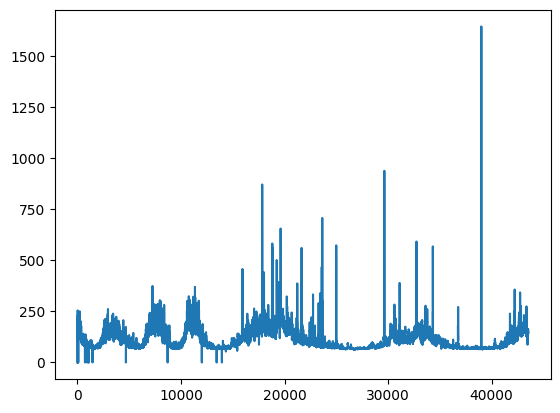

In [9]:
df['observed_flux'].plot()

<AxesSubplot:>

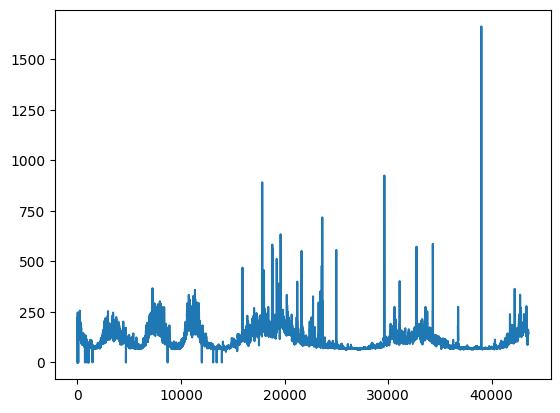

In [10]:
df['adjusted_flux'].plot()

In [ ]:
import pickle

with open('./data/f10-7.pkl', 'wb') as f:
    pickle.dump(df, f)